In [1]:
import numpy as np

In [134]:
from scipy.stats import norm, cauchy, uniform

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [249]:
low_risk_rv = norm(1, 1)
high_risk_gauss_rv = norm(-1, 25)
high_risk_cauchy_rv = cauchy(-10, 10)
high_risk_uniform_rv = uniform(-10020, 20020)

In [275]:
start_budget = 20000

high_risk_stake = .1

In [267]:
def outcome(budget, gain):
    gain = max(-100, min(10000, gain))
    return budget*(1 + gain/100.)

In [284]:
def development(budget, high_risk_rv, T=1000, high_risk_stake=.1, adjust_threshold=False):
# budget = start_budget
# high_risk_rv = high_risk_gauss_rv
# T = 1000
    development = [start_budget]
    high_risk_threshold = 10000
    high_risk_development = []
    for t in range(T):
        budget
        high_risk_budget = min(max(0, budget - high_risk_threshold), high_risk_stake*budget)
        high_risk_development.append(high_risk_budget)
        low_risk_budget = budget-high_risk_budget
        #print(low_risk_budget)
        low_risk_gain = low_risk_rv.rvs()
        high_risk_gain = high_risk_rv.rvs()
        #print(high_risk_gain)
        budget = outcome(high_risk_budget, high_risk_gain) + outcome(low_risk_budget, low_risk_gain)
        development.append(budget)
        
        if adjust_threshold and .9 * budget > high_risk_threshold:
            high_risk_threshold = 0.9 * budget
    return development, high_risk_development
    

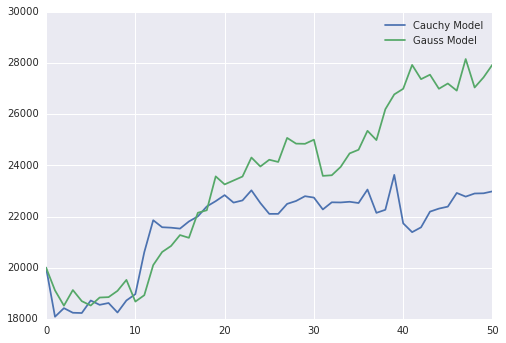

In [279]:
cauchy_dev, cauchy_hr_dev = development(start_budget, high_risk_cauchy_rv, 50, 1)
gauss_dev, gauss_hr_dev = development(start_budget, high_risk_gauss_rv, 50, 1)
plt.plot(cauchy_dev, label="Cauchy Model")
plt.plot(gauss_dev, label="Gauss Model")
plt.legend()


In [286]:

def experiment(rv, start_budget, N, T, high_risk_stake=.1, adjust_threshold=False):
    dev = np.ndarray((N, T+1))
    for n in range(N):
        dev[n, :], _ = development(start_budget, rv, T, high_risk_stake, adjust_threshold)
    return dev

In [73]:
import seaborn

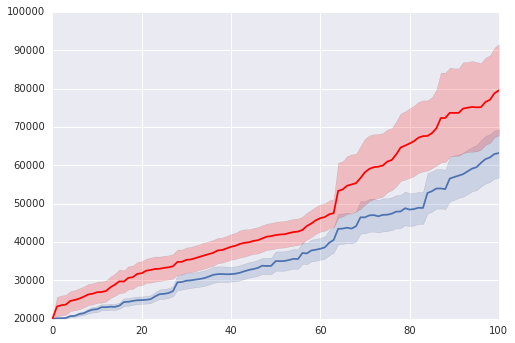

In [294]:
seaborn.tsplot(experiment(high_risk_cauchy_rv, 20000, 400, 100, .1))
seaborn.tsplot(experiment(high_risk_cauchy_rv, 20000, 400, 100, .5, True), color='red')
#seaborn.tsplot(experiment(high_risk_uniform_rv, 20000, 100, 100, 1), color='green')

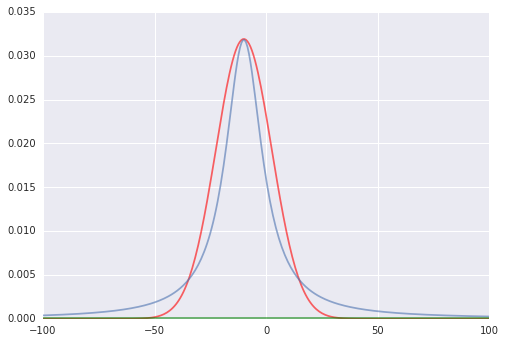

In [136]:
x = np.linspace(-100, 100, 300)
high_risk_gauss_rv = norm(-10, 12.5)
high_risk_cauchy_rv = cauchy(-10, 10)
plt.plot(x, high_risk_gauss_rv.pdf(x), 'r-', alpha=0.6, label='norm pdf')
plt.plot(x, high_risk_cauchy_rv.pdf(x), alpha=0.6, label='norm pdf')
plt.plot(x, high_risk_uniform_rv.pdf(x), 'g-', alpha=0.6, label='norm pdf')

In [186]:
np.mean(np.max(-100, np.min(10000, high_risk_cauchy_rv.rvs(size=1000))))

TypeError: only length-1 arrays can be converted to Python scalars

In [253]:
np.mean(np.clip(high_risk_uniform_rv.rvs(size=1000000), -100, 10000))

2445.1018610719207

In [251]:
np.clip(high_risk_uniform_rv.rvs(size=10), -100, 10000)

array([ 6630.04720297,  3321.85897569,  8631.50948915,  2794.17141887,
        5223.43755203,  1418.74709411,  9364.80166039,  1559.66865287,
        -100.        ,  -100.        ])

In [250]:
high_risk_uniform_rv.rvs(size=10)

array([  799.51011364, -5648.0381872 , -4081.88039855,  7564.37592337,
        5339.39340616, -6387.04387389, -2280.38535909,  9501.03158899,
        7459.8794654 , -2994.89990652])

In [247]:
10000+10020

20020